<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/TL_Resnet_50_HGR_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning ResNet 50

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/validation'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
175/175 [==============================] - 2535s 14s/step - loss: 0.4977 - accuracy: 0.8429 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/25
175/175 [==============================] - 97s 553ms/step - loss: 0.0991 - accuracy: 0.9746 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/25
175/175 [==============================] - 98s 558ms/step - loss: 0.0452 - accuracy: 0.9948 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/25
175/175 [==============================] - 97s 555ms/step - loss: 0.0489 - accuracy: 0.9882 - val_loss: 5.6097e-04 - val_accuracy: 1.0000
Epoch 5/25
175/175 [==============================] - 97s 554ms/step - loss: 0.0299 - accuracy: 0.9948 - val_loss: 5.3933e-05 - val_accuracy: 1.0000
Epoch 6/25
175/175 [==============================] - 97s 552ms/step - loss: 0.0229 - accuracy: 0.9955 - val_loss: 6.4239e-05 - val_accuracy: 1.0000
Epoch 7/25
175/175 [==============================] - 97s 552ms/step - loss: 0.0245 - accuracy: 0.9946 - val_loss: 1.8

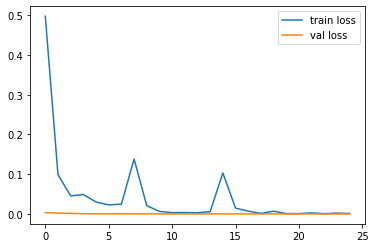

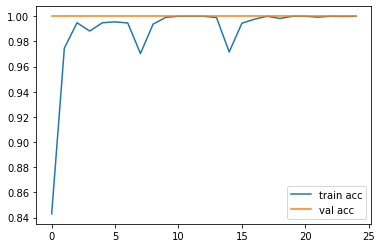

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [43]:

y_pred = model.predict(test_set)


In [44]:
y_pred

array([[6.78922110e-12, 1.00000000e+00, 4.22282626e-10],
       [5.00109123e-13, 2.09946506e-06, 9.99997854e-01],
       [9.99999642e-01, 3.78959811e-07, 1.49374435e-09],
       [9.99999285e-01, 7.14266434e-07, 1.95846606e-09],
       [2.10470429e-15, 3.75882658e-10, 1.00000000e+00],
       [2.86100001e-13, 1.22768668e-07, 9.99999881e-01],
       [4.68622619e-16, 1.93217575e-09, 1.00000000e+00],
       [9.99999762e-01, 2.96623824e-07, 1.70434777e-10],
       [9.08659346e-12, 1.00000000e+00, 8.79798789e-10],
       [2.79843260e-13, 1.00000000e+00, 8.33569602e-10],
       [9.99999762e-01, 2.21606783e-07, 1.58227639e-10],
       [9.99999762e-01, 2.50515171e-07, 1.33326461e-10],
       [5.03996096e-13, 6.97734270e-09, 1.00000000e+00],
       [9.99999642e-01, 3.46838647e-07, 1.39371431e-10],
       [2.35179081e-11, 1.00000000e+00, 1.33297062e-09],
       [9.99999881e-01, 1.76937178e-07, 1.04850344e-10],
       [1.03349190e-16, 7.82179432e-10, 1.00000000e+00],
       [2.35864019e-12, 3.52546

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 0])

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model=load_model('model_resnet50.h5')

In [49]:
img=image.load_img('/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_0073.png',target_size=(224,224))

In [50]:
x.shape


(224, 224, 3)

In [51]:
x=x/255
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [52]:
img_data

array([[[[-103.92332 , -116.76331 , -123.664314],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314],
         [-103.919395, -116.75939 , -123.66039 ]],

        [[-103.90763 , -116.74763 , -123.64863 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.91155 , -116.75155 , -123.65255 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.92332 , -116.76331 , -123.664314]],

        [[-103.915474, -116.75547 , -123.65647 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314]],

        ...,

        [[-103.91155 , -116.75155 , -1

In [53]:
x=image.img_to_array(img)
x

array([[[ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]],

       [[ 8.,  8.,  8.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 4.,  4.,  4.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.]],

       ...,

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       [[ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        [ 8.,  8.,  8.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.]],

       [[ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 6.,  6.,  6.],
        [ 2.,  2.,  2.],
        [12., 12., 12.]]

In [54]:
model.predict(img_data)

array([[4.2232347e-15, 1.0000000e+00, 4.5969002e-09]], dtype=float32)

In [55]:
a=np.argmax(model.predict(img_data), axis=1)

In [56]:
a==1

array([ True])

In [57]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [58]:
import numpy as np

data3 = np.arange(122304).reshape(52, 2352 )

data3 = data3.reshape((data3.shape[0]*3, 28, 28))

print(data3.shape)

(156, 28, 28)


In [61]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict_generator(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_set.classes, predicted_classes))
print(classification_report(test_set.classes, predicted_classes))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


['1_stop', '2_thumb', '3_ok']
[[20  5  0]
 [17  8  0]
 [13 12  0]]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53        25
           1       0.32      0.32      0.32        25
           2       0.00      0.00      0.00        25

    accuracy                           0.37        75
   macro avg       0.24      0.37      0.28        75
weighted avg       0.24      0.37      0.28        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from __future__ import division, print_function
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [63]:
MODEL_PATH = 'model_resnet50.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [64]:
img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_0048.png"

#img_path = "/content/c25_3.jpg"

img = image.load_img(img_path, target_size=(224, 224))

# Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x = x / 255
x = np.expand_dims(x, axis=0)

# Be careful how your trained model deals with the input
# otherwise, it won't make correct prediction!
# x = preprocess_input(x)

preds = model.predict(x)
print(preds)
maxElement = np.amax(preds)
print(maxElement)
preds = np.argmax(preds, axis=1)
print(preds)
if preds == 0:
    preds = "1_stop"
elif preds == 1:
    preds = "2_thumb"
elif preds == 2:
    preds = "3_ok"



print(preds)

[[9.9999964e-01 3.5907058e-07 1.7104677e-09]]
0.99999964
[0]
1_stop


In [65]:

for i in range(24):
  j=i+29
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)

1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop


In [66]:
for i in range(24):
  j=i+73
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)


2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb


In [67]:
for i in range(9):
  j=i+ 1
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/3_ok/frame_00_07_000{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)

3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
